This notebook implements autoencoder with sparse encoding, with the same number of hidden units as before.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
learning_rate = 0.0005
num_in = 784
num_h = 5
num_out = 784
num_epochs = 1200
img_size = [28,28]
batch_size = 100

In [5]:
x = tf.placeholder(tf.float32, [None,num_in])

Let's initialize the variable to which we want the activation values of out hidden layer to be.

In [6]:
rho = tf.fill([1,num_h], 0.005)

In [7]:
weights = {
    'in':tf.Variable(tf.random_normal([num_in, num_h])),
    'h':tf.Variable(tf.random_normal([num_h, num_out]))
}

biases = {
    'in':tf.Variable(tf.random_normal([1,num_h])),
    'h':tf.Variable(tf.random_normal([1,num_out]))
}

In [8]:
h_layer = tf.add(tf.matmul(x, weights['in']), biases['in'])
h_layer = tf.nn.sigmoid(h_layer)
out_layer = tf.add(tf.matmul(h_layer, weights['h']), biases['h'])

Summing over and taking the average for all the examples

In [9]:
rho_cap = tf.Variable(tf.zeros([1, num_h]))
rho_cap = rho_cap + h_layer/mnist.train.num_examples

In [10]:
error_loss_op = tf.losses.mean_squared_error(out_layer, x)

This is for calculating the the Kulchback- Leibler loss which penalizes the deviation of the hidden layer values for not being close to 0.05(in this case).

In [11]:
ones = tf.Variable(tf.ones([1,num_h]))

In [12]:
kl_loss = tf.multiply(rho, tf.log(tf.div(rho, rho_cap))) + tf.multiply((ones-rho), tf.log(tf.div(ones-rho, ones-rho_cap)))

In [13]:
kl_loss_op = tf.reduce_mean(kl_loss)

Combining Losses from the two sources, Note that the two loss functions arise because we have two motives

1) making the output layer as close as possible using a mean squared error.
2) keeping the hidden layer activation values close to 0.05

In [14]:
overall_loss_op = error_loss_op + kl_loss_op

In the begining I tried bigger learning rates, both my loss terms shot up to nans. I also tried using two different optimizers with two different learning rates for the two losses but that did'nt work well. My laptop started spitting nans once again.(I think it's a rookie mistake)

In [15]:
optimizer= tf.train.AdamOptimizer(5e-6)

In [16]:
train_op = optimizer.minimize(overall_loss_op)

In [17]:
init = tf.global_variables_initializer()

In [18]:
saver = tf.train.Saver()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples/batch_size
        c1=0
        c=0
        for _ in range(num_batches):
            batch_x, _ = mnist.train.next_batch(batch_size)
            _, cost1, cost = sess.run([train_op, kl_loss_op, error_loss_op], feed_dict={x:batch_x})
            c1 += cost1/num_batches
            c += cost/num_batches
        print('after '+str(epoch+1)+' epochs '+'error cost is '+str(c)+','+'sparse encoding cost is '+str(c1))
    save_path = saver.save(sess, '/tmp/sparse_encoder1.1.ckpt')

after 1 epochs error cost is 3.266053237481548,sparse encoding cost is 0.019290652752599932
after 2 epochs error cost is 3.1804020292108706,sparse encoding cost is 0.01868392236869444
after 3 epochs error cost is 3.0968057107925406,sparse encoding cost is 0.01820278285579249
after 4 epochs error cost is 3.015466435172337,sparse encoding cost is 0.017751624167642796
after 5 epochs error cost is 2.936195174564015,sparse encoding cost is 0.01731882517988031
after 6 epochs error cost is 2.859027912833475,sparse encoding cost is 0.01689784200354055
after 7 epochs error cost is 2.783371781435882,sparse encoding cost is 0.016485899300737822
after 8 epochs error cost is 2.7094059965827237,sparse encoding cost is 0.016080661822449077
after 9 epochs error cost is 2.6375677178122796,sparse encoding cost is 0.015681081698699438
after 10 epochs error cost is 2.567663625370372,sparse encoding cost is 0.015286754796450782
after 11 epochs error cost is 2.499407818534163,sparse encoding cost is 0.01489

after 88 epochs error cost is 0.7530625424601809,sparse encoding cost is -3.485020070609994e-09
after 89 epochs error cost is 0.7488545972650702,sparse encoding cost is -2.80341500554075e-09
after 90 epochs error cost is 0.744729022437876,sparse encoding cost is 2.115637982488153e-09
after 91 epochs error cost is 0.7406611898812375,sparse encoding cost is -4.207947286072196e-12
after 92 epochs error cost is 0.7367112886905679,sparse encoding cost is 2.5928076696957688e-09
after 93 epochs error cost is 0.7327311110496518,sparse encoding cost is 8.428202372880784e-10
after 94 epochs error cost is 0.7288736992532552,sparse encoding cost is 3.877830973565827e-09
after 95 epochs error cost is 0.7251196662946179,sparse encoding cost is 3.862978603297825e-09
after 96 epochs error cost is 0.7213545431874,sparse encoding cost is 4.875851872216851e-09
after 97 epochs error cost is 0.717716748280958,sparse encoding cost is 4.436628204588197e-09
after 98 epochs error cost is 0.7140470350872381,spa

after 174 epochs error cost is 0.5021933973919263,sparse encoding cost is 9.964242916158008e-09
after 175 epochs error cost is 0.4999246547980739,sparse encoding cost is 1.0465166049224785e-08
after 176 epochs error cost is 0.49759858570315585,sparse encoding cost is 9.998029310073e-09
after 177 epochs error cost is 0.49535919866778627,sparse encoding cost is 1.0553439391799725e-08
after 178 epochs error cost is 0.4931077138944107,sparse encoding cost is 1.1387526198694797e-08
after 179 epochs error cost is 0.49086903008547716,sparse encoding cost is 1.1248468335894376e-08
after 180 epochs error cost is 0.48862524715336875,sparse encoding cost is 1.0335315468028168e-08
after 181 epochs error cost is 0.4863990040258928,sparse encoding cost is 1.094655288763372e-08
after 182 epochs error cost is 0.4842014009302318,sparse encoding cost is 8.38222384672394e-09
after 183 epochs error cost is 0.48198009956966736,sparse encoding cost is 8.078183355296587e-09
after 184 epochs error cost is 0.4

after 260 epochs error cost is 0.33932018615982795,sparse encoding cost is 9.055879647386737e-09
after 261 epochs error cost is 0.3377970588749104,sparse encoding cost is 1.0896414727053343e-08
after 262 epochs error cost is 0.3362513448433445,sparse encoding cost is 1.1486049293377389e-08
after 263 epochs error cost is 0.33473077031699094,sparse encoding cost is 1.0601618436947094e-08
after 264 epochs error cost is 0.33321841667998947,sparse encoding cost is 1.1773619502377075e-08
after 265 epochs error cost is 0.33171970475803697,sparse encoding cost is 8.87228772845285e-09
after 266 epochs error cost is 0.33021711885929084,sparse encoding cost is 9.826949985370065e-09
after 267 epochs error cost is 0.32873099998994315,sparse encoding cost is 9.469005288652682e-09
after 268 epochs error cost is 0.32722284441644467,sparse encoding cost is 1.1954748019801651e-08
after 269 epochs error cost is 0.32576873053203953,sparse encoding cost is 1.1195252132323056e-08
after 270 epochs error cost

after 345 epochs error cost is 0.23255523990501048,sparse encoding cost is 1.2540892475611372e-08
after 346 epochs error cost is 0.2315324861894956,sparse encoding cost is 1.2254434281400673e-08
after 347 epochs error cost is 0.23055842562155285,sparse encoding cost is 1.3640689345839625e-08
after 348 epochs error cost is 0.22957241475582119,sparse encoding cost is 1.3914427126028972e-08
after 349 epochs error cost is 0.2285656416145239,sparse encoding cost is 1.507422927020764e-08
after 350 epochs error cost is 0.2275903513756665,sparse encoding cost is 1.1816714443780376e-08
after 351 epochs error cost is 0.2266173838214441,sparse encoding cost is 1.4491312154248484e-08
after 352 epochs error cost is 0.22565522497350485,sparse encoding cost is 1.2415484216146186e-08
after 353 epochs error cost is 0.22468512900850993,sparse encoding cost is 1.3939344172668332e-08
after 354 epochs error cost is 0.22372052769769332,sparse encoding cost is 1.2409181978374131e-08
after 355 epochs error co

after 429 epochs error cost is 0.1646800812807949,sparse encoding cost is 1.0772339301327361e-08
after 430 epochs error cost is 0.16406053348021074,sparse encoding cost is 1.2515211847646316e-08
after 431 epochs error cost is 0.16342357177626,sparse encoding cost is 1.4114218845996296e-08
after 432 epochs error cost is 0.1628024874492124,sparse encoding cost is 1.193402086088883e-08
after 433 epochs error cost is 0.16219387054443374,sparse encoding cost is 1.409951615734639e-08
after 434 epochs error cost is 0.16156313229690902,sparse encoding cost is 1.2736268166145797e-08
after 435 epochs error cost is 0.16093383201143943,sparse encoding cost is 1.2316655508857655e-08
after 436 epochs error cost is 0.1603443606604229,sparse encoding cost is 1.1191913864397069e-08
after 437 epochs error cost is 0.15970607180487034,sparse encoding cost is 1.2655740724685183e-08
after 438 epochs error cost is 0.15913516356186425,sparse encoding cost is 1.3082033640204368e-08
after 439 epochs error cost 

after 514 epochs error cost is 0.12191357697952884,sparse encoding cost is 1.3335229227166349e-08
after 515 epochs error cost is 0.12151786080815578,sparse encoding cost is 1.3212517463273747e-08
after 516 epochs error cost is 0.12113220025192609,sparse encoding cost is 1.59421288967618e-08
after 517 epochs error cost is 0.12074931104074817,sparse encoding cost is 1.242787215589216e-08
after 518 epochs error cost is 0.12036103808067065,sparse encoding cost is 1.3358219245767304e-08
after 519 epochs error cost is 0.11997339124029334,sparse encoding cost is 1.2583057836094853e-08
after 520 epochs error cost is 0.11960358783602722,sparse encoding cost is 1.3975256978305412e-08
after 521 epochs error cost is 0.11922221153974545,sparse encoding cost is 1.3181210367111097e-08
after 522 epochs error cost is 0.11885105219754302,sparse encoding cost is 1.4895522526625109e-08
after 523 epochs error cost is 0.11847620468248024,sparse encoding cost is 1.540087203998442e-08
after 524 epochs error c

after 598 epochs error cost is 0.0959624126011675,sparse encoding cost is 1.1615291669257097e-08
after 599 epochs error cost is 0.09573273101990874,sparse encoding cost is 1.0744201452152346e-08
after 600 epochs error cost is 0.09549122009765017,sparse encoding cost is 1.3223757745812141e-08
after 601 epochs error cost is 0.09527236174453388,sparse encoding cost is 1.0273672329989385e-08
after 602 epochs error cost is 0.09503403086553926,sparse encoding cost is 1.1430579809516471e-08
after 603 epochs error cost is 0.09481171823360705,sparse encoding cost is 1.2442793908400014e-08
after 604 epochs error cost is 0.09458886109969841,sparse encoding cost is 1.1611788496274981e-08
after 605 epochs error cost is 0.09436392347921028,sparse encoding cost is 9.793411598750407e-09
after 606 epochs error cost is 0.0941348576003856,sparse encoding cost is 1.1001807353238942e-08
after 607 epochs error cost is 0.09392078486355863,sparse encoding cost is 1.1523605636583217e-08
after 608 epochs error 

after 682 epochs error cost is 0.08116163688627152,sparse encoding cost is 1.1505135394221126e-08
after 683 epochs error cost is 0.08104279522191399,sparse encoding cost is 9.202365042412777e-09
after 684 epochs error cost is 0.08091397145932376,sparse encoding cost is 1.1895436018093249e-08
after 685 epochs error cost is 0.08078360004858541,sparse encoding cost is 9.17755066080977e-09
after 686 epochs error cost is 0.0806693940406496,sparse encoding cost is 9.853445618087582e-09
after 687 epochs error cost is 0.0805385322733359,sparse encoding cost is 1.1651178911740383e-08
after 688 epochs error cost is 0.08042485135522744,sparse encoding cost is 1.1543357731990715e-08
after 689 epochs error cost is 0.08030582414431997,sparse encoding cost is 1.1792072517310699e-08
after 690 epochs error cost is 0.08018003188750962,sparse encoding cost is 1.1219570242769791e-08
after 691 epochs error cost is 0.0800608943267302,sparse encoding cost is 1.2481543753866227e-08
after 692 epochs error cost

after 766 epochs error cost is 0.07343111924149763,sparse encoding cost is 1.1176587535133594e-08
after 767 epochs error cost is 0.07335914128205988,sparse encoding cost is 1.1554748671943376e-08
after 768 epochs error cost is 0.07330671853639867,sparse encoding cost is 1.1839797197153232e-08
after 769 epochs error cost is 0.07324533108960514,sparse encoding cost is 9.779199362589735e-09
after 770 epochs error cost is 0.07318411462686278,sparse encoding cost is 1.2156970911235796e-08
after 771 epochs error cost is 0.07310468324206097,sparse encoding cost is 1.3250833628881837e-08
after 772 epochs error cost is 0.07305576275695455,sparse encoding cost is 9.192910843902865e-09
after 773 epochs error cost is 0.07299903239716181,sparse encoding cost is 1.1918705147563735e-08
after 774 epochs error cost is 0.07292329998178913,sparse encoding cost is 1.1997157916586077e-08
after 775 epochs error cost is 0.0728722755610943,sparse encoding cost is 1.065281523017869e-08
after 776 epochs error c

after 851 epochs error cost is 0.06953913340514355,sparse encoding cost is 1.3779932238396711e-08
after 852 epochs error cost is 0.0694969799843702,sparse encoding cost is 1.0676030973963161e-08
after 853 epochs error cost is 0.06946645188060674,sparse encoding cost is 1.0416743619572944e-08
after 854 epochs error cost is 0.06943120448426775,sparse encoding cost is 1.0949321693093238e-08
after 855 epochs error cost is 0.0694090743227438,sparse encoding cost is 9.733255141851233e-09
after 856 epochs error cost is 0.06937975340268826,sparse encoding cost is 1.1666001067995279e-08
after 857 epochs error cost is 0.06934228486635469,sparse encoding cost is 8.900545974162122e-09
after 858 epochs error cost is 0.0693149308860302,sparse encoding cost is 1.0271015059011008e-08
after 859 epochs error cost is 0.06928716415708717,sparse encoding cost is 9.526359338116945e-09
after 860 epochs error cost is 0.06925442673943269,sparse encoding cost is 1.0743510076908905e-08
after 861 epochs error cos

after 936 epochs error cost is 0.06762879808518019,sparse encoding cost is 1.109909521992211e-08
after 937 epochs error cost is 0.06759779351678771,sparse encoding cost is 1.0148220455704429e-08
after 938 epochs error cost is 0.06759599402546879,sparse encoding cost is 9.842499187412806e-09
after 939 epochs error cost is 0.067582713236863,sparse encoding cost is 1.1312681615449116e-08
after 940 epochs error cost is 0.06755922515961257,sparse encoding cost is 9.440761962710819e-09
after 941 epochs error cost is 0.06755344535139478,sparse encoding cost is 1.0400298416667146e-08
after 942 epochs error cost is 0.06753352185541939,sparse encoding cost is 1.0172656798287678e-08
after 943 epochs error cost is 0.06752668216147205,sparse encoding cost is 1.1039100422004618e-08
after 944 epochs error cost is 0.06750389544801276,sparse encoding cost is 1.0017814778658478e-08
after 945 epochs error cost is 0.06749520626257764,sparse encoding cost is 1.0301975436469565e-08
after 946 epochs error co

after 1020 epochs error cost is 0.06680478821423913,sparse encoding cost is 1.0062999418495e-08
after 1021 epochs error cost is 0.06679205167699948,sparse encoding cost is 1.1401528137805792e-08
after 1022 epochs error cost is 0.06678258442743261,sparse encoding cost is 1.0212478955245391e-08
after 1023 epochs error cost is 0.0667906559258699,sparse encoding cost is 1.0905355662166833e-08
after 1024 epochs error cost is 0.0667731011455709,sparse encoding cost is 1.3864391296530958e-08
after 1025 epochs error cost is 0.06677003667435866,sparse encoding cost is 1.147629357454362e-08
after 1026 epochs error cost is 0.06676203821193086,sparse encoding cost is 9.765974958858559e-09
after 1027 epochs error cost is 0.06675308740274474,sparse encoding cost is 1.0285478410037623e-08
after 1028 epochs error cost is 0.06674464643001553,sparse encoding cost is 9.939932250256963e-09
after 1029 epochs error cost is 0.06675038708881899,sparse encoding cost is 9.731337828527659e-09
after 1030 epochs e

after 1104 epochs error cost is 0.06642119997604327,sparse encoding cost is 1.132746183456212e-08
after 1105 epochs error cost is 0.06643026858568188,sparse encoding cost is 1.091938010044262e-08
after 1106 epochs error cost is 0.06641694372350514,sparse encoding cost is 1.10284523686817e-08
after 1107 epochs error cost is 0.06642482659356168,sparse encoding cost is 1.2946879614783577e-08
after 1108 epochs error cost is 0.06641075993803414,sparse encoding cost is 1.1849419738047045e-08
after 1109 epochs error cost is 0.06641209325329825,sparse encoding cost is 1.0940163216934605e-08
after 1110 epochs error cost is 0.06639583532783118,sparse encoding cost is 1.5704746336114326e-08
after 1111 epochs error cost is 0.06640785799785098,sparse encoding cost is 1.3754589674629502e-08
after 1112 epochs error cost is 0.06641277399930086,sparse encoding cost is 1.0841959244846504e-08
after 1113 epochs error cost is 0.06640300353142355,sparse encoding cost is 1.2724624333502149e-08
after 1114 epo

after 1188 epochs error cost is 0.06622392064468431,sparse encoding cost is 1.368924467660108e-08
after 1189 epochs error cost is 0.06622413981367248,sparse encoding cost is 1.3623287282991748e-08
after 1190 epochs error cost is 0.06622895705428991,sparse encoding cost is 1.273529826589666e-08
after 1191 epochs error cost is 0.06620733992619947,sparse encoding cost is 1.4083671611986322e-08
after 1192 epochs error cost is 0.0662189074402506,sparse encoding cost is 1.223153865782495e-08
after 1193 epochs error cost is 0.06621300074864514,sparse encoding cost is 1.3216199323262674e-08
after 1194 epochs error cost is 0.06621078976853327,sparse encoding cost is 1.4037867257251689e-08
after 1195 epochs error cost is 0.0662022885815664,sparse encoding cost is 1.3474513090204072e-08
after 1196 epochs error cost is 0.066212925680659,sparse encoding cost is 1.2562619540449316e-08
after 1197 epochs error cost is 0.06620569771663709,sparse encoding cost is 1.2913137295339992e-08
after 1198 epochs

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder1.1.ckpt


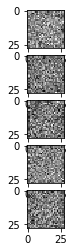

In [21]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder1.1.ckpt')
    fig, axes = plt.subplots(5,1)
    for i,ax in enumerate(axes.flat):
        template = tf.transpose(weights['in'][:,i])
        template = template.eval()
        template = template/np.max(template)
        template = template.reshape((28,28))
        ax.imshow(template, cmap = 'binary')
        #plt.show()

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder1.1.ckpt


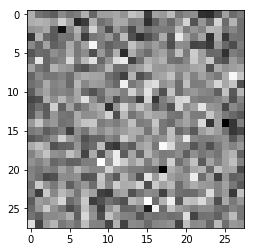

In [36]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder1.1.ckpt')
    template = weights['in'][:,0]
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder1.1.ckpt


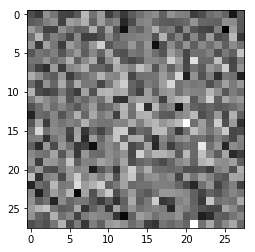

In [29]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder1.1.ckpt')
    template = weights['in'][:,1]
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder1.1.ckpt


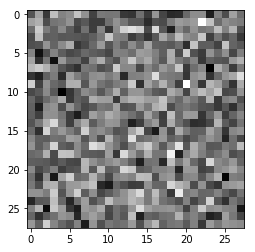

In [30]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder1.1.ckpt')
    template = weights['in'][:,2]
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder1.1.ckpt


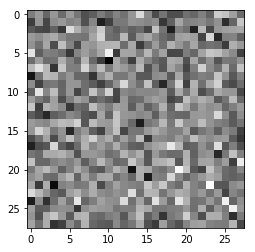

In [31]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder1.1.ckpt')
    template = weights['in'][:,3]
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')

INFO:tensorflow:Restoring parameters from /tmp/sparse_encoder1.1.ckpt


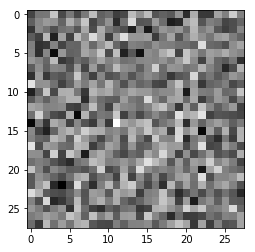

In [32]:
with tf.Session() as sess:
    saver.restore(sess, '/tmp/sparse_encoder1.1.ckpt')
    template = weights['in'][:,4]
    template = template.eval()
    template = template/np.sqrt(np.sum(template**2))
    template = template.reshape((28,28))
    plt.imshow(template, cmap = 'binary')